

# What is a Credit Scoring System?

A **Credit Scoring System** is a financial tool used to evaluate the creditworthiness of individuals or businesses applying for loans or credit. It is a quantitative assessment of a person’s ability and likelihood to repay debt based on several financial and behavioral factors. The credit score, typically a three-digit number, summarizes a person’s credit history and predicts the risk associated with lending to them.

The system takes into account multiple factors, including:
- **Payment History**: Whether an individual pays their bills on time.
- **Credit Utilization**: The percentage of available credit currently being used.
- **Length of Credit History**: How long the individual has maintained credit accounts.
- **Types of Credit Used**: Credit cards, mortgages, auto loans, etc.
- **Recent Credit Inquiries**: Whether the individual has applied for new credit recently.

Credit scoring models use these factors to generate a score, which lenders use to make decisions about whether to approve or deny credit applications, as well as to determine loan terms (interest rates, loan limits, etc.).

## 1. Package imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.pipeline import make_pipeline
import joblib

## 2. Dataset import

In [3]:


# Load the dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = ['Existing Checking Account', 'Duration', 'Credit History', 'Purpose',
                'Credit Amount', 'Savings Account', 'Employment Since', 'Installment Rate',
                'Personal Status and Sex', 'Other Debtors', 'Residence Since',
                'Property', 'Age', 'Other Installment Plans', 'Housing', 'Existing Credits',
                'Job', 'Liable Persons', 'Telephone', 'Foreign Worker', 'Target']
df = pd.read_csv(url, delim_whitespace=True, names=column_names)

# Display first few rows
print('\nSample records of the dataset\n')
print(df.head())

# Check the structure of the dataset
print('\nStructure of the dataset\n')
print(df.info())

# Check for missing values
print('\nMissing value count\n')
print(df.isnull().sum())

# Summary statistics for numeric features
print('\nStats about the numerical features\n')
print(df.describe())

# Unique values in categorical columns
print('\nUnique value count of Categorical columns\n')
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col} has {df[col].nunique()} unique values')


<ipython-input-3-92cd2f0ad146>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names)



Sample records of the dataset

  Existing Checking Account  Duration Credit History Purpose  Credit Amount  \
0                       A11         6            A34     A43           1169   
1                       A12        48            A32     A43           5951   
2                       A14        12            A34     A46           2096   
3                       A11        42            A32     A42           7882   
4                       A11        24            A33     A40           4870   

  Savings Account Employment Since  Installment Rate Personal Status and Sex  \
0             A65              A75                 4                     A93   
1             A61              A73                 2                     A92   
2             A61              A74                 2                     A93   
3             A61              A74                 2                     A93   
4             A61              A73                 3                     A93   

  Other Debt

## 3. Exploratory Data Analysis

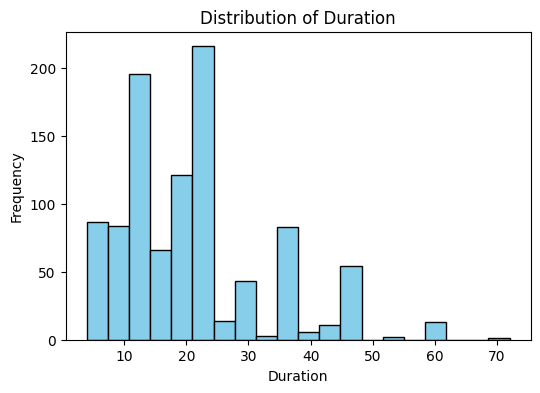

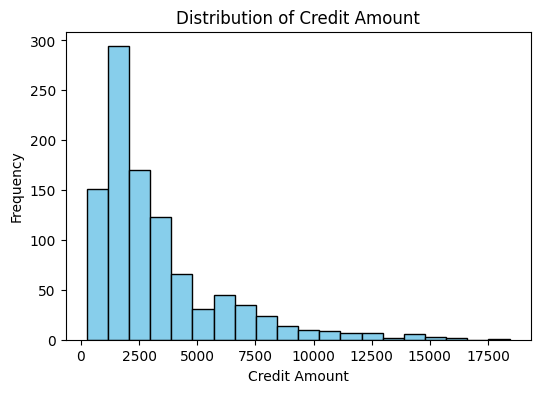

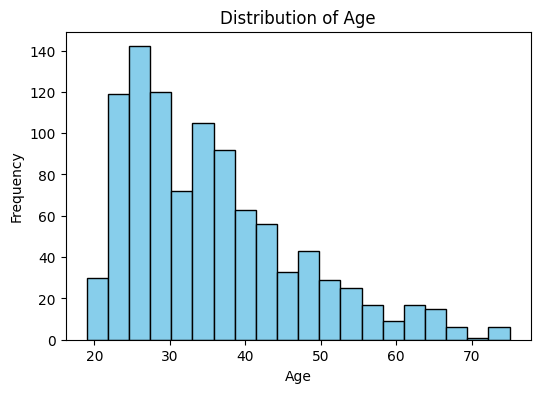

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


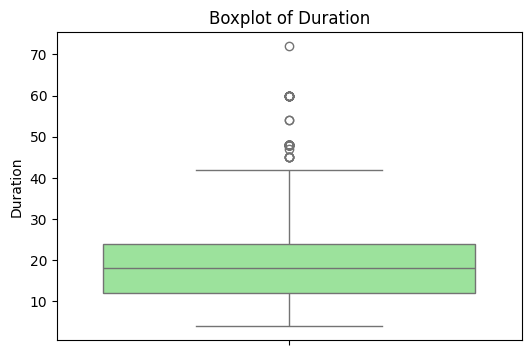

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


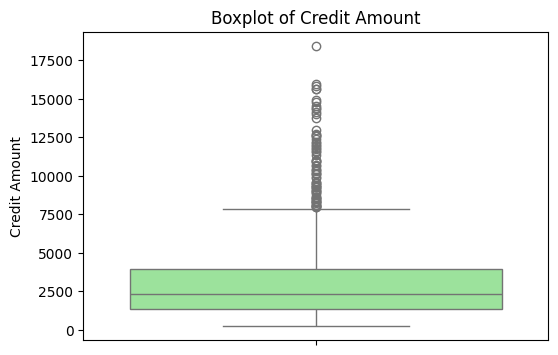

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


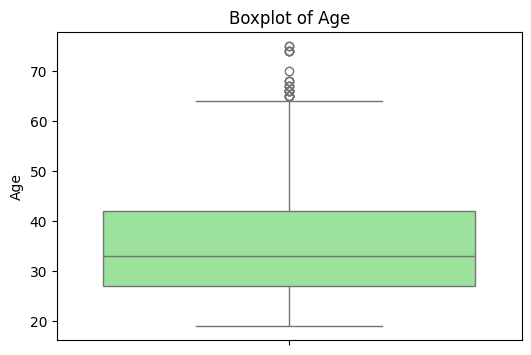

<ipython-input-5-b503187ca96c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, 

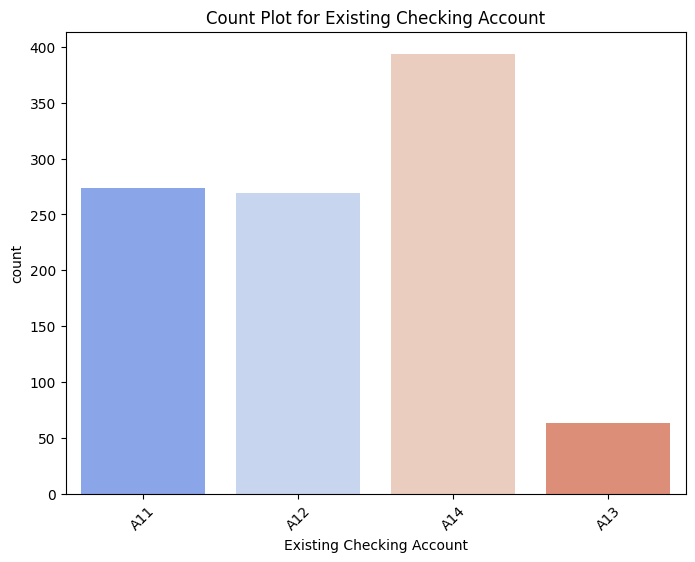

<ipython-input-5-b503187ca96c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, 

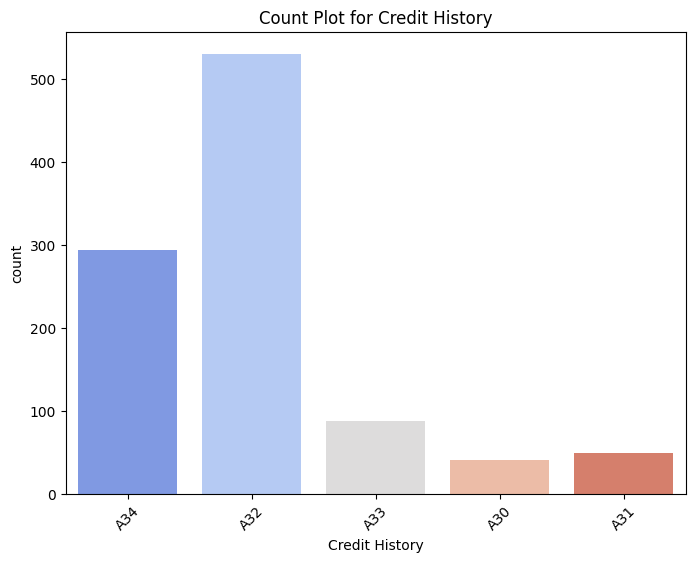

<ipython-input-5-b503187ca96c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, 

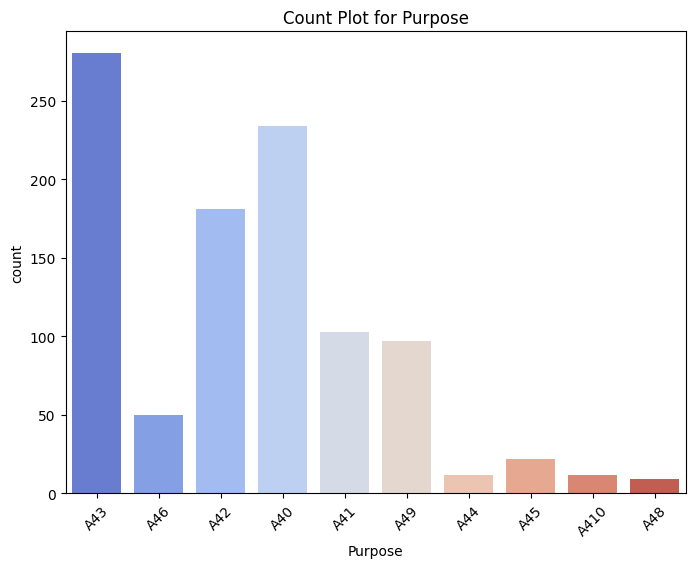

<ipython-input-5-b503187ca96c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, 

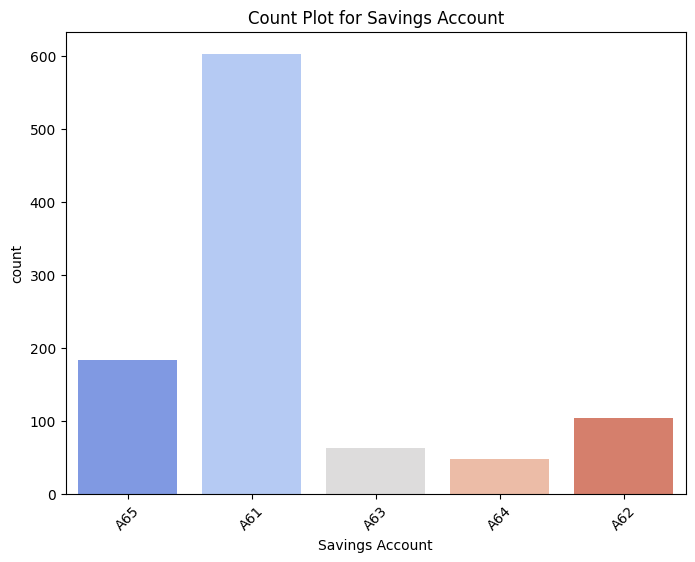

<ipython-input-5-b503187ca96c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, 

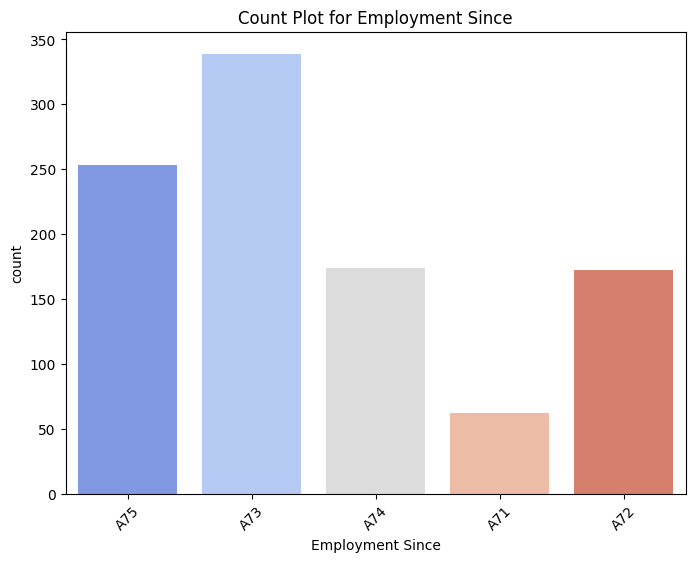

<ipython-input-5-b503187ca96c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, 

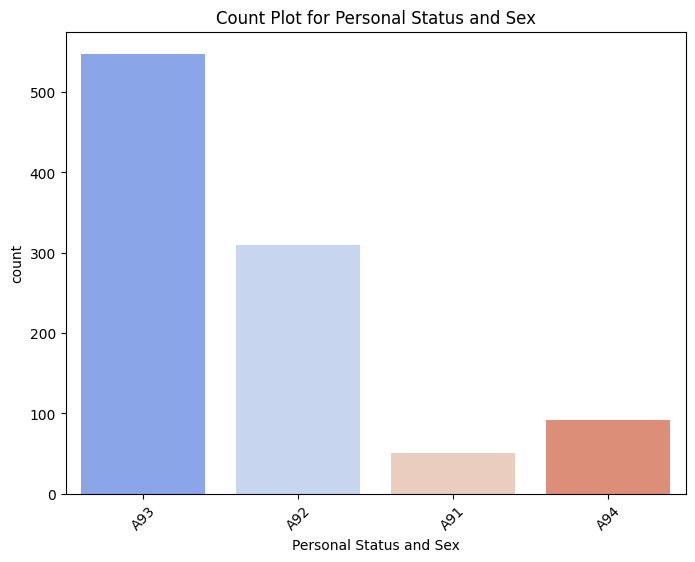

<ipython-input-5-b503187ca96c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, 

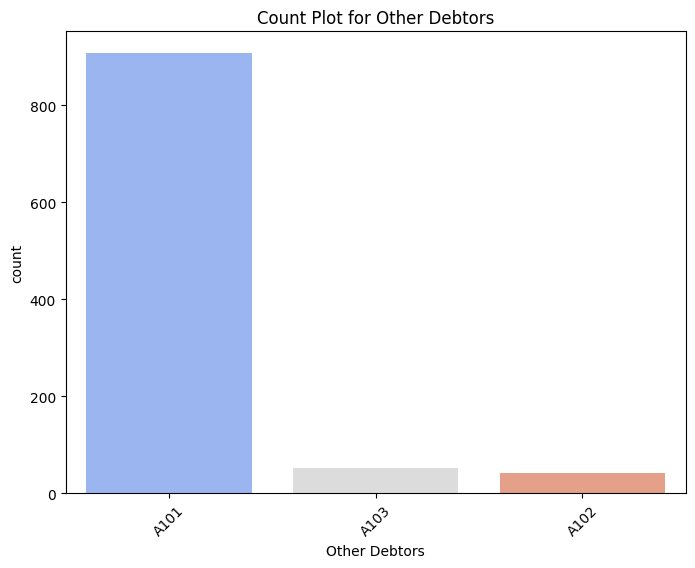

<ipython-input-5-b503187ca96c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, 

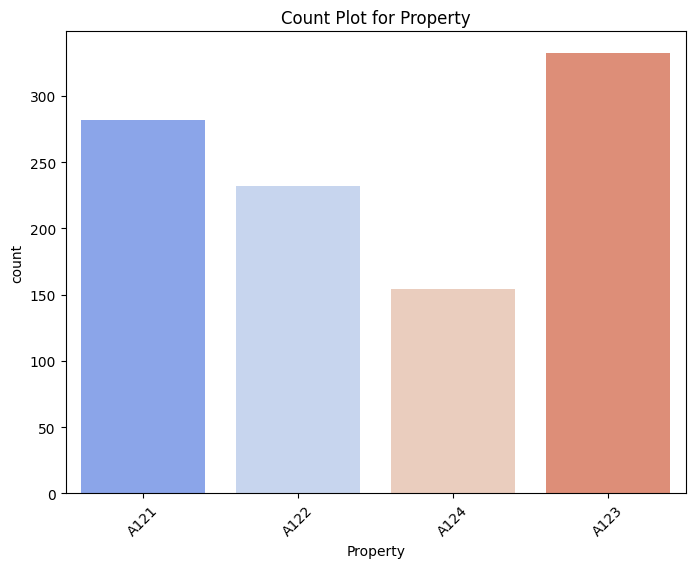

<ipython-input-5-b503187ca96c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, 

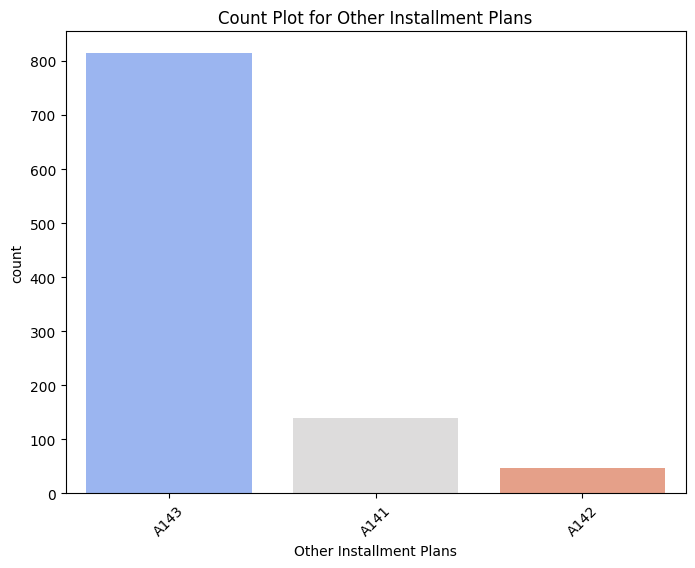

<ipython-input-5-b503187ca96c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, 

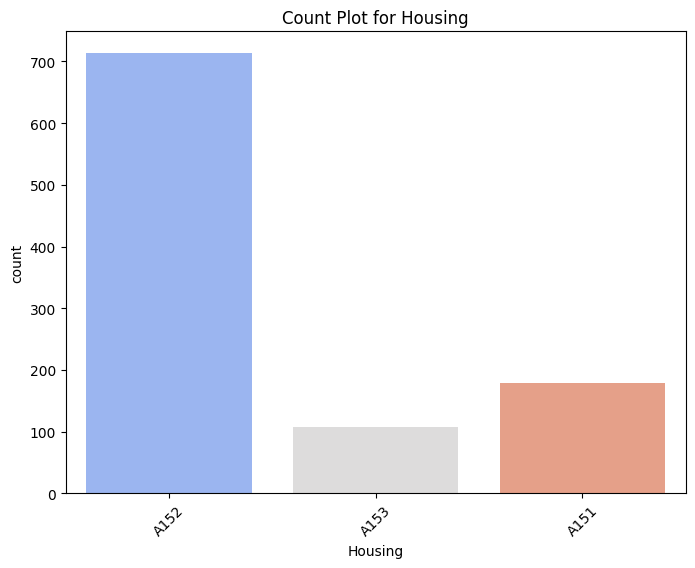

<ipython-input-5-b503187ca96c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, 

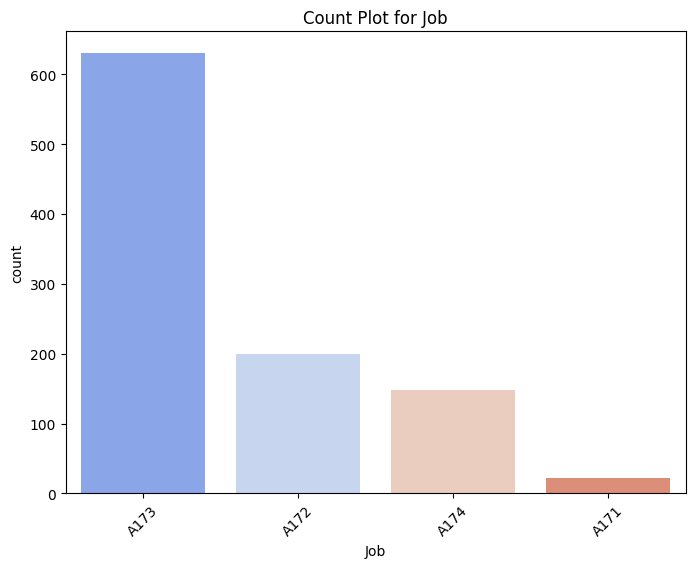

<ipython-input-5-b503187ca96c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


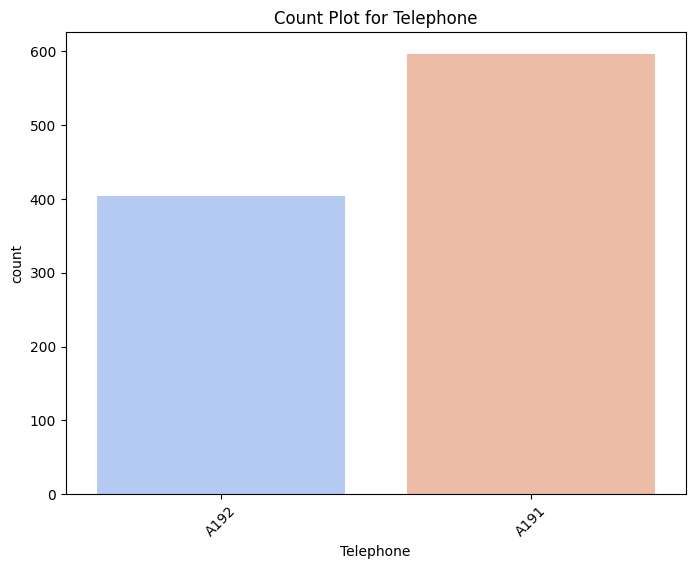

<ipython-input-5-b503187ca96c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


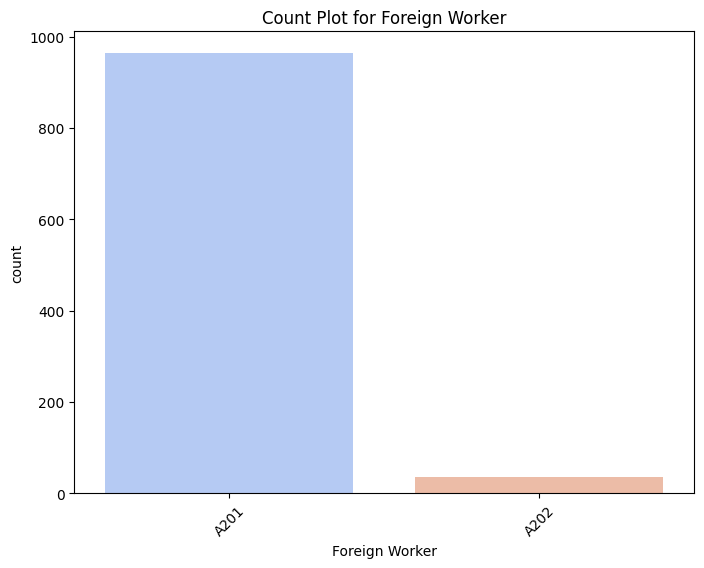

In [5]:
# Plotting histograms for numeric features
numeric_columns = ['Duration', 'Credit Amount', 'Age']

for col in numeric_columns:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    fname = col.replace(" ","")
    #plt.savefig(f'/content/credit_scoring/images/1_Distribution_of_{fname}.png',dpi=None)
    plt.show()

# Boxplots for numeric features to identify outliers
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    fname = col.replace(" ","")
    #plt.savefig(f'/content/credit_scoring/images/2_box_plot_of_{fname}.png',dpi=None)
    plt.show()

# Bar plots for categorical variables
categorical_columns = ['Existing Checking Account', 'Credit History', 'Purpose', 'Savings Account',
                       'Employment Since', 'Personal Status and Sex', 'Other Debtors', 'Property',
                       'Other Installment Plans', 'Housing', 'Job', 'Telephone', 'Foreign Worker']

for col in categorical_columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=df, palette='coolwarm')
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    fname = col.replace(" ","")
    #plt.savefig(f'/content/credit_scoring/images/3_count_plot_of_{fname}.png',dpi=None)
    plt.show()


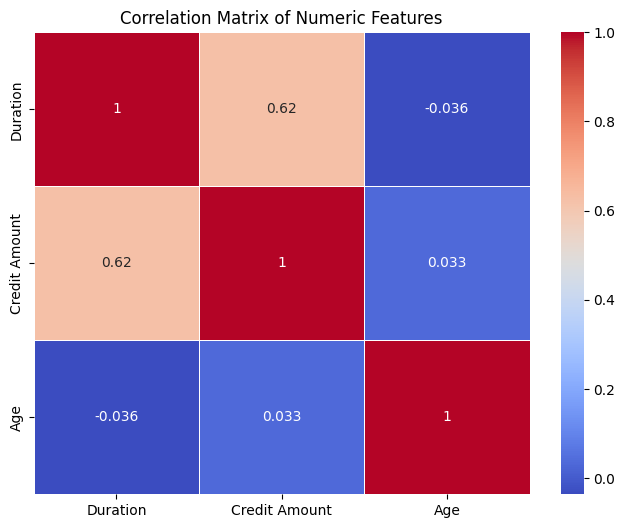

<ipython-input-6-5d54ac684575>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='Credit Amount', data=df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_grou

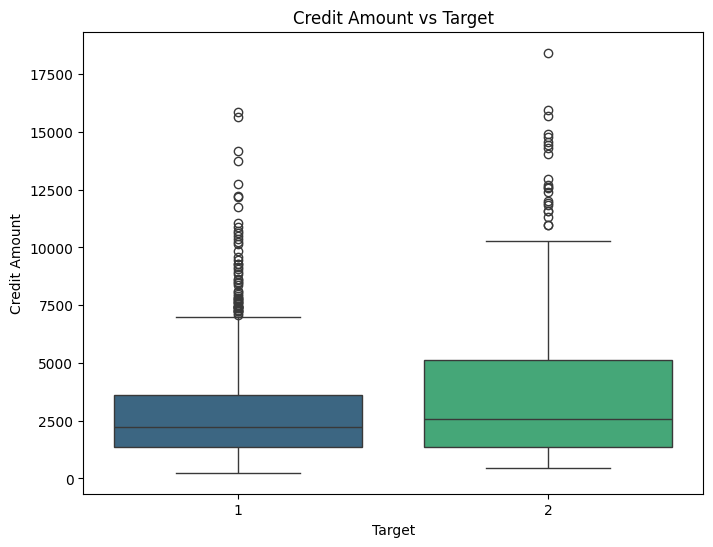

In [6]:
# Correlation heatmap for numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
#plt.savefig(f'/content/credit_scoring/images/4_heatmap_numeric_feature.png',dpi=None)
plt.show()

# Boxplot of Credit Amount by Target (to check if creditworthiness affects credit amount)
plt.figure(figsize=(8,6))
sns.boxplot(x='Target', y='Credit Amount', data=df, palette='viridis')
plt.title('Credit Amount vs Target')
#plt.savefig(f'/content/credit_scoring/images/5_boxplot_credit_target.png',dpi=None)
plt.show()




/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

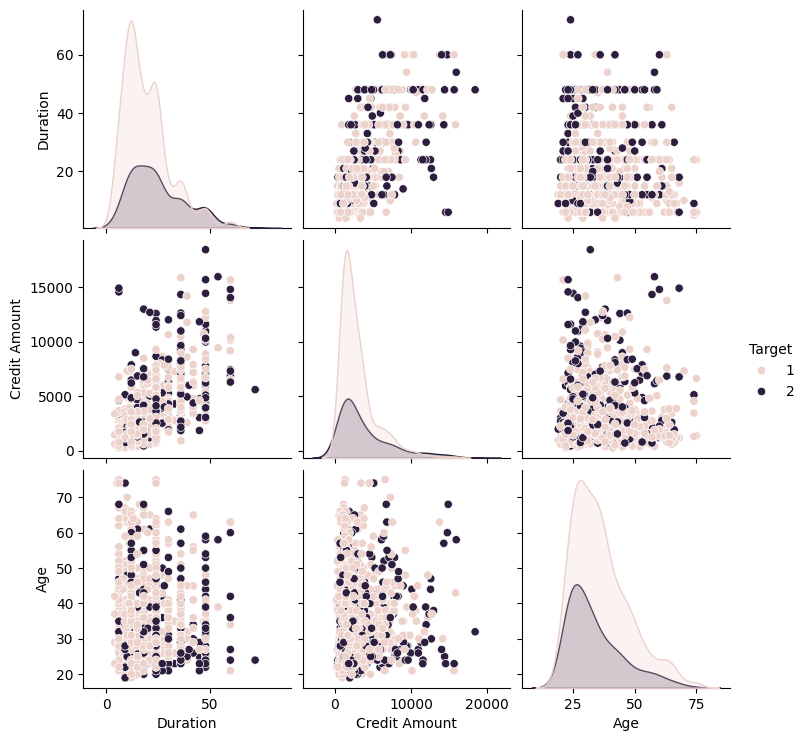

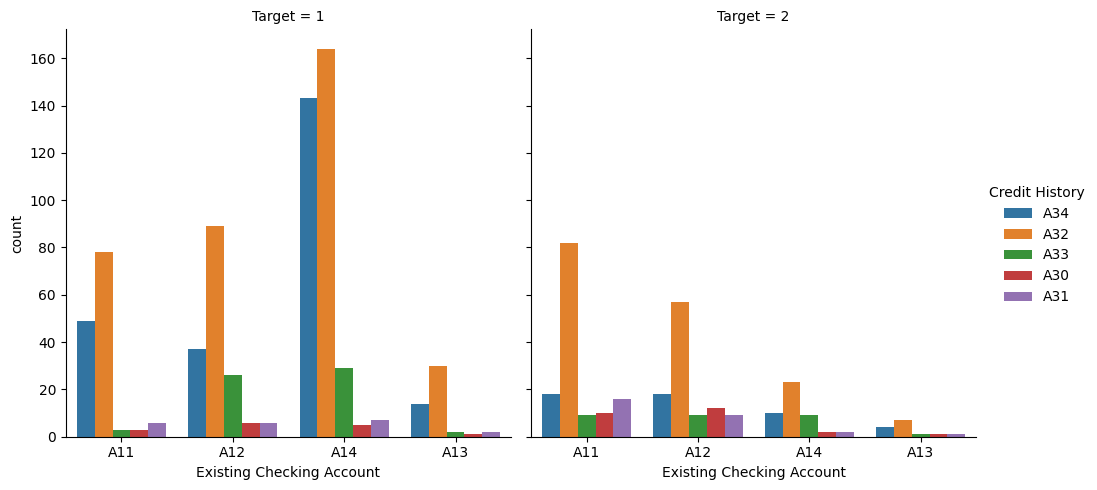

In [7]:
# Pairplot for selected numeric features to observe their relationship
sns.pairplot(df, hue='Target', vars=['Duration', 'Credit Amount', 'Age'])
#plt.savefig(f'/content/credit_scoring/images/6_pairplot_numeric_target.png',dpi=None)
plt.show()

# Checking the interaction between two categorical variables with respect to the target variable
sns.catplot(x="Existing Checking Account", hue="Credit History", col="Target", data=df, kind="count", height=5, aspect=1)
#plt.savefig(f'/content/credit_scoring/images/7_pairplot_categorical_target.png',dpi=None)
plt.show()


## 4. Data Preprocessing

In [8]:
# Separate numerical and categorical features
numerical_features = ['Duration', 'Credit Amount', 'Installment Rate', 'Residence Since', 'Age', 'Existing Credits']

# Convert categorical variables to numeric using Label Encoding
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Encode the target variable (1 for "good" credit, 2 for "bad" credit)
df['Target'] = df['Target'].map({1: 1, 2: 0})  # 1 indicates good credit risk, 0 indicates bad

# Split data into features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Verify the target varible
print(y.value_counts())
print(y.dtypes)

Target
1    700
0    300
Name: count, dtype: int64
int64


In [9]:
# Handling class imbalance with SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Model Training and Evaluation

In [10]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'k-NN': KNeighborsClassifier()
}

# Train each model and store results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Store metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_prob': y_prob
    }

    # Print classification report
    print(f'Classification Report for {name}:')
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.84      0.80       202
           1       0.84      0.78      0.80       218

    accuracy                           0.80       420
   macro avg       0.81      0.81      0.80       420
weighted avg       0.81      0.80      0.80       420

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       202
           1       0.78      0.69      0.73       218

    accuracy                           0.74       420
   macro avg       0.74      0.74      0.74       420
weighted avg       0.74      0.74      0.74       420

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       202
           1       0.87      0.79      0.83       218

    accuracy                           0.83       420

## 6. Confusion Matrix Visualization

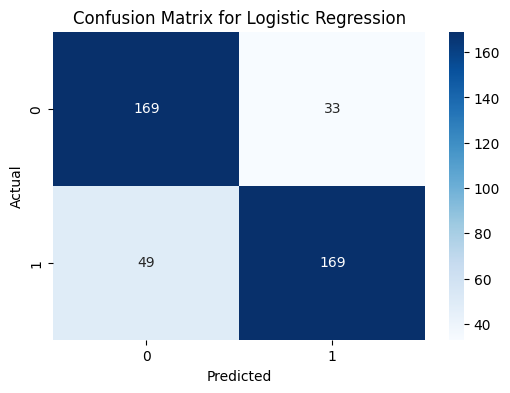

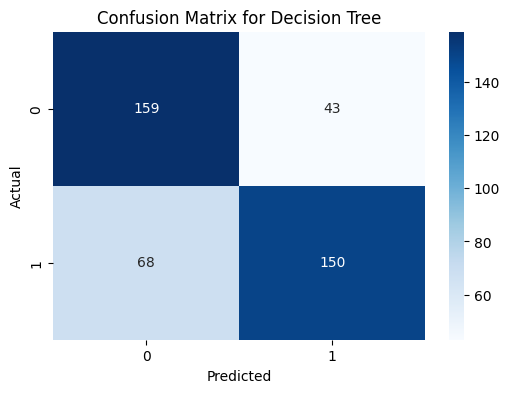

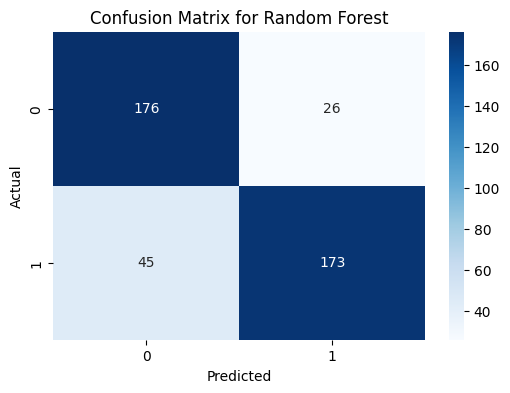

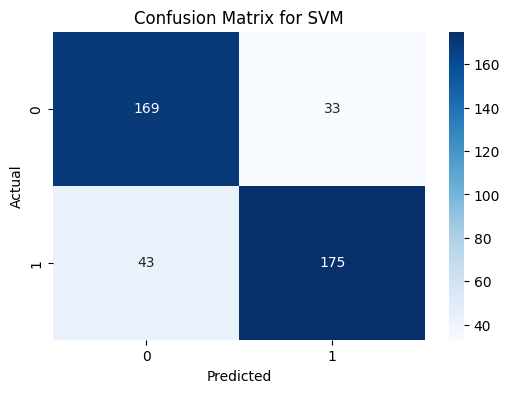

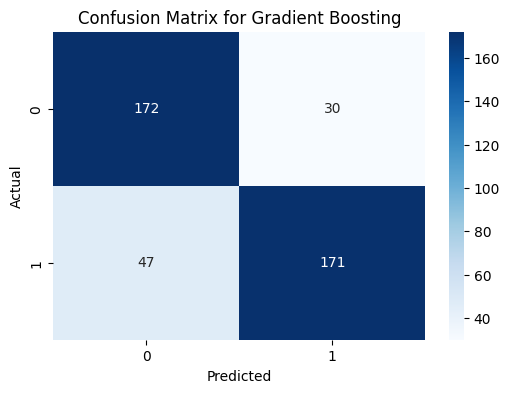

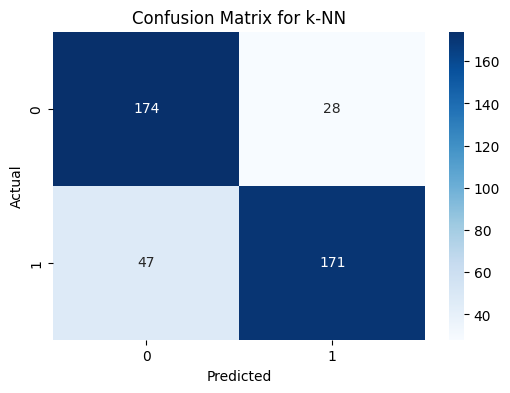

In [11]:
for name, result in results.items():
    cm = confusion_matrix(y_test, result['y_pred'])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    #plt.savefig(f'/content/credit_scoring/images/8_confusion_matrix_{name}.png',dpi=None)
    plt.show()


## 7. ROC Curve and AUC Curve

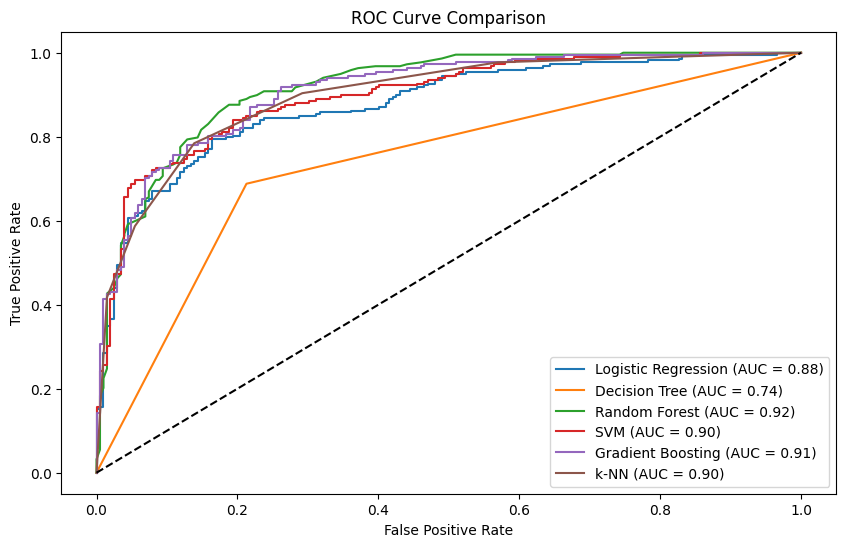

In [12]:
plt.figure(figsize=(10, 6))

for name, result in results.items():
    if result['y_prob'] is not None:  # Check if the model provides probability predictions
        fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
        auc_score = roc_auc_score(y_test, result['y_prob'])
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
#plt.savefig(f'/content/credit_scoring/images/9_roc_curve.png',dpi=None)
plt.show()


## 8. Accuracy Comparison Bar Plot

<ipython-input-14-40a72b321cc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When

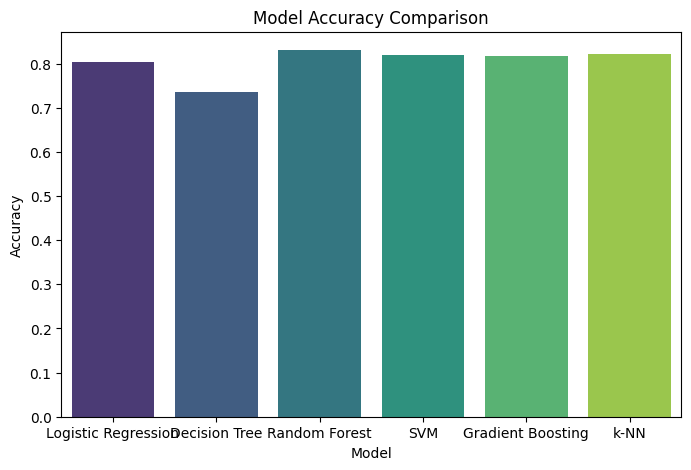

In [14]:
accuracies = {name: result['accuracy'] for name, result in results.items()}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
#plt.savefig(f'/content/credit_scoring/images/10_bar_plot_model_comparison.png',dpi=None)
plt.show()


## 1. Hyperparameter Tuning with Grid Search for Random Forest

Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8153


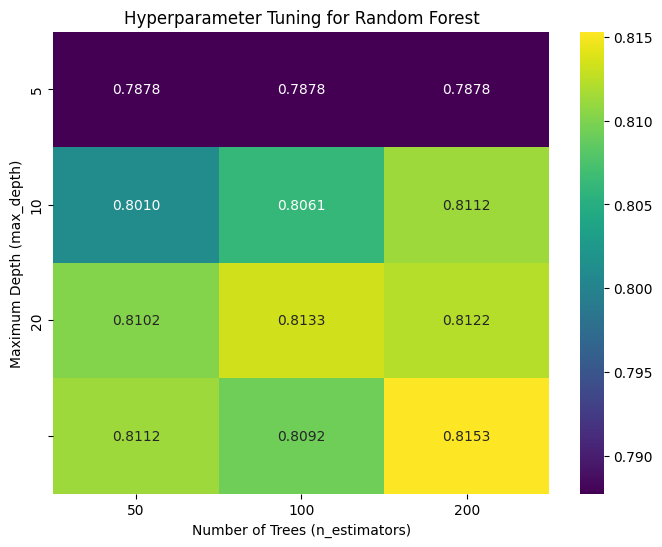

In [15]:
# 1. Hyperparameter Tuning for Random Forest

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None]
}

# Grid search with cross-validation
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_accuracy:.4f}')

# Extract grid search results and visualize as a heatmap
scores = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['max_depth']), len(param_grid['n_estimators']))

plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, fmt='.4f', cmap='viridis',
            xticklabels=param_grid['n_estimators'], yticklabels=param_grid['max_depth'])
plt.title('Hyperparameter Tuning for Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Maximum Depth (max_depth)')
plt.show()


# 2: Feature Importance Analysis with Random Forest


<ipython-input-16-a7933cf282e1>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: Wh

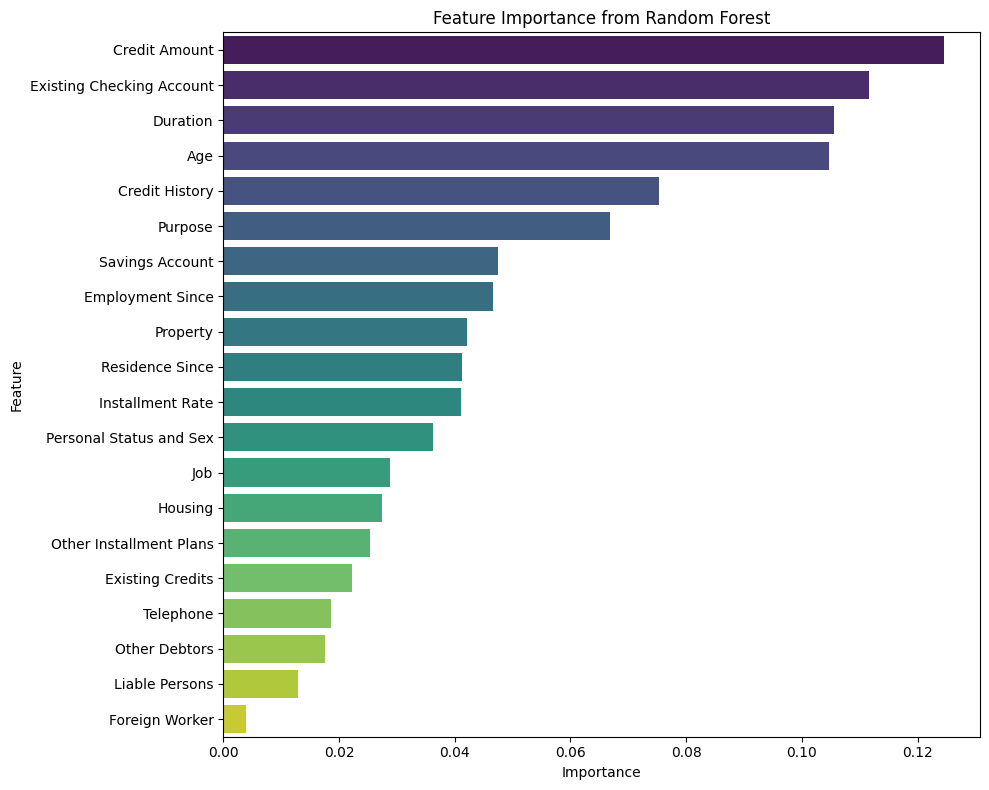

In [16]:
feature_names = ['Status of existing checking account', 'Duration in month', 'Credit history',
                 'Purpose', 'Credit amount', 'Savings account/bonds', 'Present employment since',
                 'Installment rate in percentage of disposable income', 'Personal status and sex',
                 'Other debtors / guarantors', 'Present residence since', 'Property',
                 'Age in years', 'Other installment plans', 'Housing', 'Number of existing credits at this bank',
                 'Job', 'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker']


# Split data into training and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

# One-hot encode categorical features (assuming some features are categorical)
X_train_rf = pd.get_dummies(X_train_rf, drop_first=True)
X_test_rf = pd.get_dummies(X_test_rf, drop_first=True)

# Align train and test sets (in case they have different dummy columns after encoding)
X_train_rf, X_test_rf = X_train_rf.align(X_test_rf, join='left', axis=1, fill_value=0)

# Train Random Forest with some parameters
best_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
best_rf.fit(X_train_rf, y_train_rf)

# Get feature importances
importances = best_rf.feature_importances_
feature_names_after_encoding = X_train_rf.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names_after_encoding, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


# 3. Cross-Validation to Ensure Model Robustness

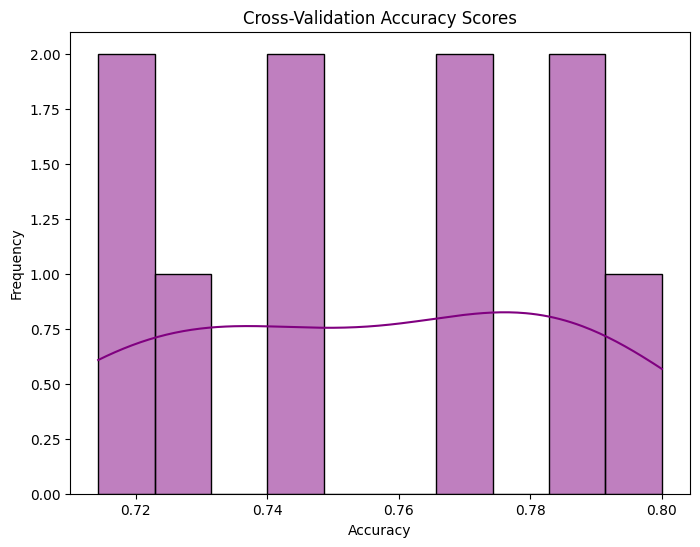

Mean CV Accuracy: 0.7557
Standard Deviation of CV Accuracy: 0.0296


In [17]:


# Cross-validation
cv_scores = cross_val_score(best_rf, X_train_rf, y_train_rf, cv=10, scoring='accuracy')

# Plot the cross-validation scores
plt.figure(figsize=(8, 6))
sns.histplot(cv_scores, kde=True, color='purple', bins=10)
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

# Print mean and standard deviation of the cross-validation scores
print(f'Mean CV Accuracy: {np.mean(cv_scores):.4f}')
print(f'Standard Deviation of CV Accuracy: {np.std(cv_scores):.4f}')


# 4. Model Evaluation on Test Set with Visualizations

In [18]:
#1. Making Predictions on the Test Set

# Make predictions on the test set
y_pred_rf = best_rf.predict(X_test_rf)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f'Random Forest Test Accuracy: {accuracy_rf:.4f}')


Random Forest Test Accuracy: 0.7533


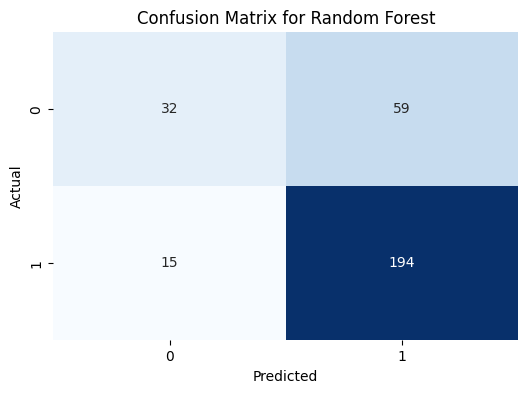

In [19]:
#2. Confusion Matrix
# Confusion matrix
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [20]:
#3. Classification Report
# Classification report
print('Classification Report for Random Forest:')
print(classification_report(y_test_rf, y_pred_rf))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.68      0.35      0.46        91
           1       0.77      0.93      0.84       209

    accuracy                           0.75       300
   macro avg       0.72      0.64      0.65       300
weighted avg       0.74      0.75      0.73       300



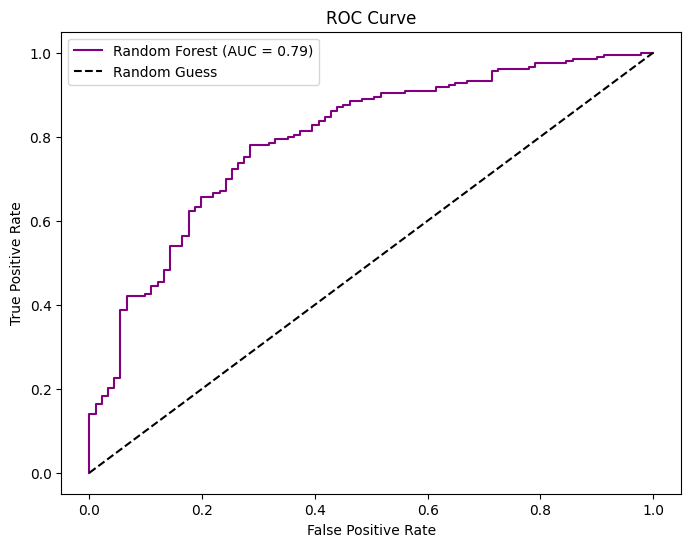

In [21]:
#4. ROC Curve and AUC
# Predict probabilities
y_prob_rf = best_rf.predict_proba(X_test_rf)[:, 1]

# Calculate ROC AUC
roc_auc_rf = roc_auc_score(y_test_rf, y_prob_rf)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_rf, y_prob_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='purple')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


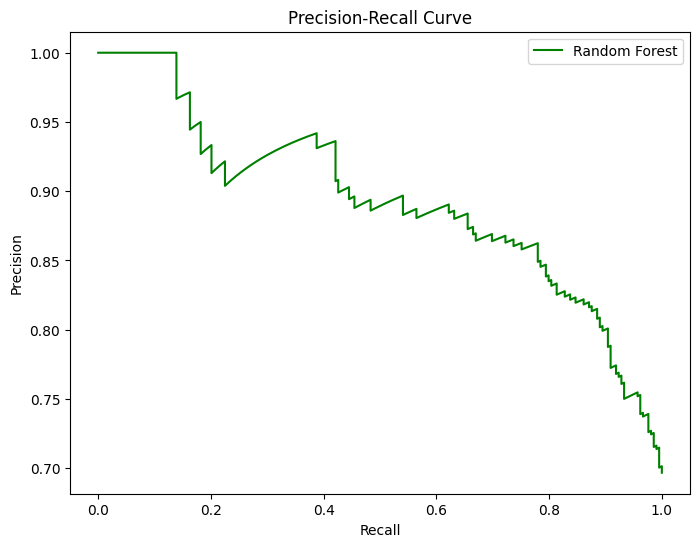

In [22]:
#5. Precision-Recall Curve


# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_rf, y_prob_rf)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Random Forest', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


# 5. Exploring Support Vector Machine (SVM) with Visualizations

In [23]:
# 1. SVM Model Training


# Create a pipeline with a scaler and the SVM model
svm_model = make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))

# Fit the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Test Accuracy: {accuracy_svm:.4f}')


SVM Test Accuracy: 0.8190


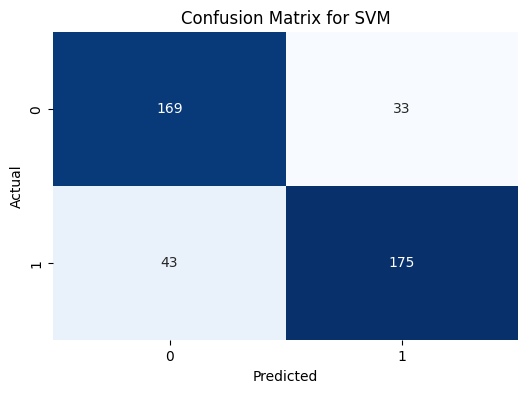

In [24]:
#2. Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [25]:
# 3. Classification Report for SVM
print('Classification Report for SVM:')
print(classification_report(y_test, y_pred_svm))


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       202
           1       0.84      0.80      0.82       218

    accuracy                           0.82       420
   macro avg       0.82      0.82      0.82       420
weighted avg       0.82      0.82      0.82       420



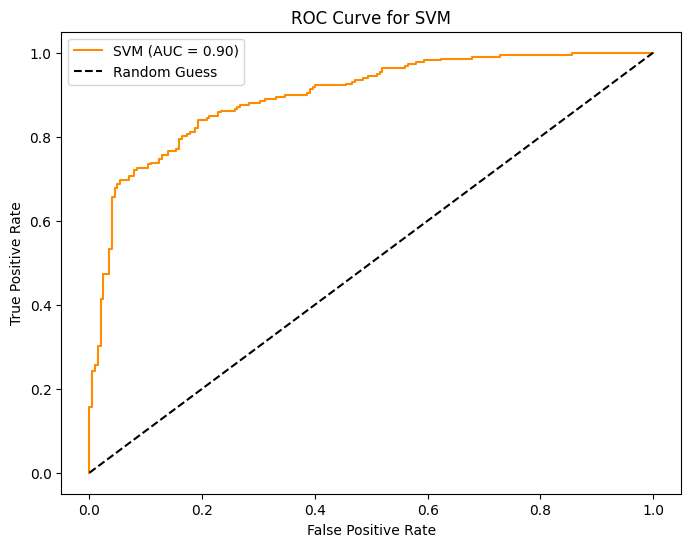

In [26]:
# 4. ROC Curve and AUC for SVM
# Predict probabilities for SVM
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC for SVM
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# Compute ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.show()


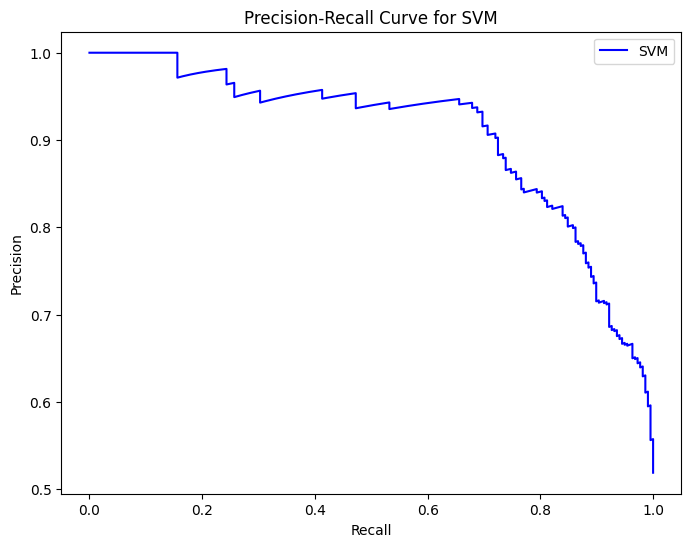

In [27]:
# 5. Precision-Recall Curve for SVM
# Compute precision-recall curve for SVM
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)

# Plot precision-recall curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, label='SVM', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.legend()
plt.show()


# 7: Hyperparameter Tuning for SVM Using Grid Search

In [28]:
# 1. Performing Grid Search


# Define the parameter grid for SVM
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1]
}

# Create a pipeline with StandardScaler and SVM
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))

# Use GridSearchCV to find the best parameters
grid_search_svm = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_svm = grid_search_svm.best_estimator_
best_params_svm = grid_search_svm.best_params_
print(f'Best parameters for SVM: {best_params_svm}')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for SVM: {'svc__C': 1, 'svc__gamma': 0.1}


In [29]:
# 2. Evaluating the Best SVM Model
# Make predictions using the best SVM model
y_pred_best_svm = best_svm.predict(X_test)

# Calculate accuracy
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print(f'Best SVM Test Accuracy: {accuracy_best_svm:.4f}')


Best SVM Test Accuracy: 0.8143


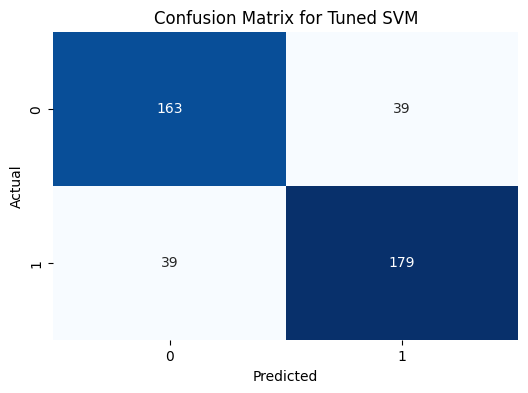

In [30]:
# 3. Confusion matrix for the tuned SVM
cm_best_svm = confusion_matrix(y_test, y_pred_best_svm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Tuned SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


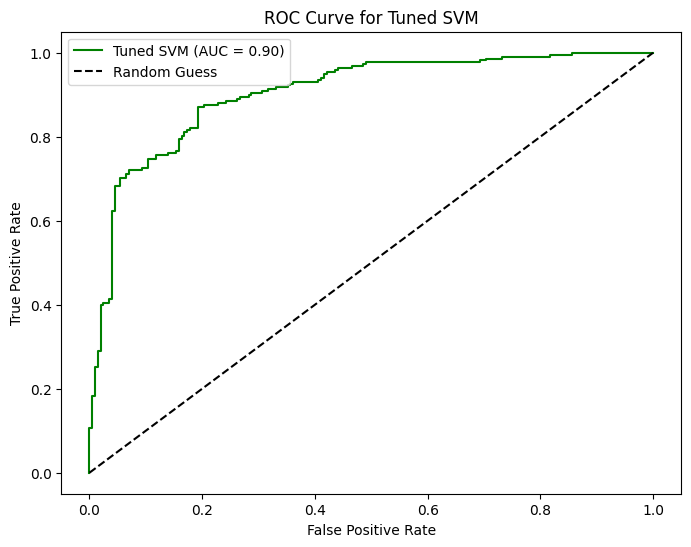

In [31]:
# 4. ROC Curve and AUC for the Tuned SVM
# Predict probabilities for the tuned SVM
y_prob_best_svm = best_svm.predict_proba(X_test)[:, 1]

# Calculate ROC AUC for the tuned SVM
roc_auc_best_svm = roc_auc_score(y_test, y_prob_best_svm)

# Compute ROC curve for the tuned SVM
fpr_best_svm, tpr_best_svm, _ = roc_curve(y_test, y_prob_best_svm)

# Plot ROC curve for the tuned SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_svm, tpr_best_svm, label=f'Tuned SVM (AUC = {roc_auc_best_svm:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned SVM')
plt.legend()
plt.show()


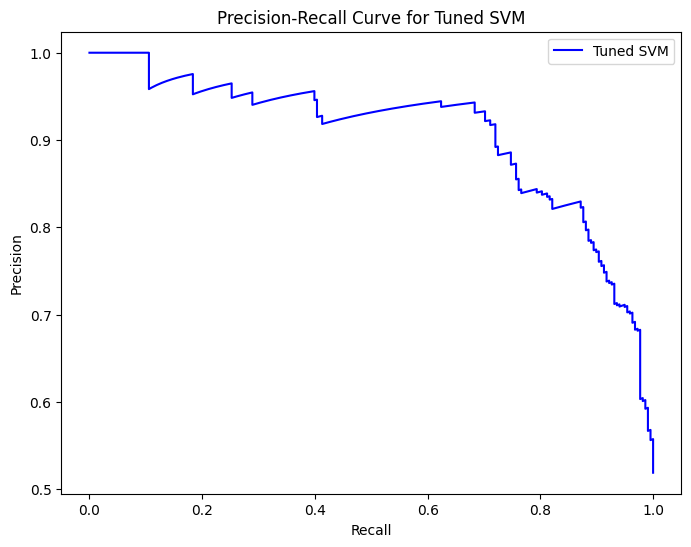

In [32]:
# 5. Precision-Recall Curve for the Tuned SVM
# Compute precision-recall curve for the tuned SVM
precision_best_svm, recall_best_svm, _ = precision_recall_curve(y_test, y_prob_best_svm)

# Plot precision-recall curve for the tuned SVM
plt.figure(figsize=(8, 6))
plt.plot(recall_best_svm, precision_best_svm, label='Tuned SVM', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Tuned SVM')
plt.legend()
plt.show()


# Steps and Summary for Deployment of Credit Scoring System

In [33]:
# 1. Model Serialization (Saving the Model)


# Save the trained Random Forest model
joblib.dump(best_rf, 'credit_scoring_model.pkl')


['credit_scoring_model.pkl']